# 第三章 TensorFlow基本开发步骤————以逻辑回归拟合二维数据为例

### TensorFlow开发的基本步骤如下：

（1）定义TensorFlow输入节点  
（2）定义“学习参数”变量  
（3）定义“运算”  
（4）优化函数，优化目标  
（5）初始化所有变量  
（6）迭代更新参数到最优解  
（7）测试模型  
（8）使用模型

## 实例一：从一组看似混乱的数据中找出y≈2x的规律

### 实例描述

假设有一组数据集，其x和y的对应关系是y≈2x  
本实例就是让神经网络学习这些样本，并能够找到其中的规律，即让神经网络能够总结出y≈2x这样的公式。  
深度学习大概有以下4个步骤：  
1.准备数据  
2.搭建模型  
3.迭代训练  
4.使用模型

### 3.1.1 准备数据

这里使用y=2x这个公式作为主体，通过加入一些干扰噪声让他的“等号”变成“约等于”。  
具体代码如下：  

<font color="red">运行以下代码</font>

In [1]:
#导入头文件，然后生成-1~1之间的100个数作为x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_X = np.linspace(-1,1,100)

C:\Users\MrLen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<font color="red">运行以下代码</font>

In [2]:
#将x乘以2，再加上一个[-1,1]区间的随机数*0.3。即，y=2*x+a*0.3(a属于[-1,1]之间的随机数)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3    #y=2x,但是加入了噪声

注意：np.random.randn(*train\_X.shape)这个代码如果看起来比较奇怪,现在给出解释————它等同于np.random.randn(100)

<font color="red">运行以下代码</font>

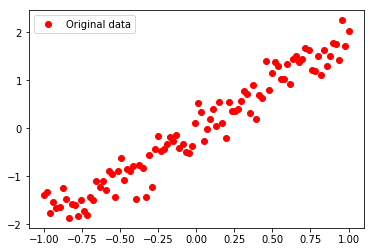

In [3]:
#显示模拟数据点
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

### 3.1.2 搭建模型

现在开始进行模型搭建。模型分为两个方向：正向和反向。

#### 1.正向模型搭建 

（1）了解模型及其公式  
（2）创建模型  
下面的代码演示了如何创建模型

### TensorFlow中有如下几种定义输入节点的方法：

\*通过占位符定义：一般使用这种方式  
\*通过字典类型定义：一般用于输入比较多的情况  
\*直接定义：一般很少使用

##### <font color="red"> 1.使用占位符来定义输入节点</font>

<font color="red">运行以下代码</font>

In [4]:
#创建模型
#占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")

##### 2.通过字典类型定义输入节点

In [ ]:
#占位符
inputdict = {
    'x': tf.placeholder("float"),
    'y': tf.placeholder("float")
}

##### 3.直接定义输入节点 

直接定义，就是将定义好的Python变量直接放到OP节点中参与输入的运算，将模拟数据的变量直接放到模型中进行训练。代码如下：

In [ ]:
#生成模拟数据
train_X = np.float32(np.linspace(-1,1,100))                     #!!! train_X = np.linspace(-1,1,100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3
#图形显示
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

#模型参数
W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.zeros([1]),name="bias")
#前向结构
z = tf.multiply(W,train_X) + b                                   #!!! z = tf.multiply(X,W) + b

### 定义“学习参数”的变量

学习参数的定义与输入的定义很像，分为直接定义和字典定义两部分。这两种都是常见的使用方式，只不过在深层神经网络里由于参数过多，普遍会使用第二种情况。

##### <font color="red">1.直接定义“学习参数”变量<\font>

<font color="red">运行以下代码</font>

In [5]:
#模型参数
W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.zeros([1]),name="bias")
#前向结构
z = tf.multiply(X,W) + b

##### 2.通过字典类型定义“学习参数” 

通过字典定义的方式定义和直接定义比较相似，只不过是堆叠在了一起。

In [ ]:
#模型参数
paradict = {
    'w': tf.Variable(tf.random_normal([1])),
    'b': tf.Variable(tf.zeros([1]))
}
#前向结构
z = tf.multiply(X,paradict['w']) + paradict['b']

1.X和Y：为占位符，使用了placeholder函数进行定义。一个代表x的输入，一个代表对应的真实值y。  
2.W和b：为参数。W被初始化成[-1,1]的随机数，形状为一维的数字，b的初始化为0，形状也是一维的数字。  
3.Vaeiable：定义变量。  
4.tf.multiply：是两个数相乘的意思，结果再加上b就等于z了。

### 定义“运算”

定义“运算”的过程是建立模型的核心过程，直接决定了模型的拟合效果。这里主要阐述一下定义运算的类型，以及其在深度学习中的作用。

###### 1.定义正向传播模型 

在本例中使用的网络结构很简单，只用一个神经元。在后面会学到多层神经网络、卷积神经网络、循环神经网络及更深层的GoogLeNet、Resnet等，他们都是由神经元以不同的组合方式组成的网络结构，而且每年还会有很多更高效且拟合性更强的新结构诞生。

##### 2.定义损失函数 

损失函数主要是计算“输出值”与“目标值”之间的误差，是配合反向传播使用的。为了在反向传播中可以找到最小值，要求该函数必须是可导的。

#### 2.反向搭建模型

神经网络在训练的过程中数据的流向有两个方向，即想通过正向生成一个值，然后观察其与真实值的差距，再通过反向过程将里面的参数进行调整，接着再次正向生成预测值并与真实值进行比对，这样循环下去，直到将参数调整为合适值为止。  
正向相对比较好理解，反向传播会引入一些算法来实现对参数的正确调整。  
下面先看一下反向优化的相关代码。

<font color="red">运行以下代码</font>

In [6]:
#反向优化
#定义一个cost，它等于生成值与真实值的平方差
cost = tf.reduce_mean(tf.square(Y - z))
#定义一个学习率，代表调整参数的速度
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  #梯度下降

学习率一般是小于1的。这个值越大，表明调整的速度越大，但不精确；值越小，表明调整的精度越高，但速度慢。  
GradientDescentOptimizer函数是一个封装好的梯度下降算法，里面的参数learning_rate叫做学习率，用来指定参数调节的速度。

### 优化函数，优化目标

再有了正向结构和损失函数后，就是通过优化函数来优化学习参数了，这个过程也是在反向传播中完成的。

反向传播过程，就是沿着正向传播的结构向相反方向将误差传递过去。这里面涉及到的技术比较多，如L1、L2正则化、冲量调节、学习率自适应、adm随机梯度下降算法等，每一个技巧都代表一个时代。

### 初始化所有变量

初始化所有变量的过程，虽然只有一句代码，但也是一个关键环节，所以特意将其列出来

在session创建好了之后，第一件事就是需要初始化。代码如下：

In [ ]:
init = tf.global_variables_initializer()
#启动Session
with tf.Session() as sess:
    sess.run(init)

注意：使用tf.global_variables_initializer函数初始化所有变量的步骤，必须在所有变量和OP定义完成之后。这样才能保证定义的内容有效，否则，初始化之后定义的变量和OP都无法使用session中的run来进行算值。

### 迭代更新参数到最优解

在更新迭代环节，都是需要通过建立一个session来完成的，常用的是使用with语法，可以在session结束后自行关闭，当然还有其他方法。

In [ ]:
with tf.Session() as sess:

前面说过，在session中通过run来运算模型中的节点，在训练环节也是如此，只不过run里面放的是优化操作的OP，同时会在外层加上循环次数

In [ ]:
for epoch in range(training_epochs):
    for (x,y) in zip(train_X,train_Y):
        sess.run(optimizer,feed_dict={X:x,Y:y})

真正使用过程中会引入一个叫做MINIBATCH概念进行迭代训练，即每次取一定量的数据同时放到网络里进行训练，这样做的好处和意义会在后面详细介绍。

### 测试模型

测试模型部分已经不是神经网络的核心环节了，同时对评估节点的输出，得到模型的准确率（或错误率）从而来描述模型的好坏，这部分就很简单没有太多的技术。在本例中有如下代码：

In [ ]:
print("cost=",sess.run(cost,feed_dict={X:train_X,Y:train_Y}),"W=",sess.run(W),"b=",sess.run(b))

当然这句话还可以改写成以下这样：

In [ ]:
print ("cost:",cost.eval({X:train_X,Y:train_Y}))

### 3.1.3 迭代训练模型 

迭代训练的代码分成两步来完成：

#### 1.训练模型

建立好模型后，可以通过迭代来训练模型了。TensorFlow中的任务是通过session来进行的。  
下面的代码中，先进行全局初始化，然后设置训练迭代的次数，启动session开始运行任务。

In [ ]:
#初始化所有变量
init = tf.global_variables_initializer()
#定义参数
training_epochs = 20
display_step = 2

#启动session
sess = tf.Session()
sess.run(init)
plotdata={"batchsize":[],"loss":[]}
#向模型输入数据
for epoch in range(training_epochs):
    for (x,y) in zip(train_X,train_Y):
        sess.run(optimizer,feed_dict={X:x,Y:y})
        
    #显示训练中的详细信息
    if epoch % display_step == 0:
        loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
        print("Epoch:",epoch+1,"cost=",loss,"W=",sess.run(W),"b=",sess.run(b))
        if not (loss == "NA"):
            plotdata["batchsize"].append(epoch)
            plotdata["loss"].append(loss)
    
print(" Finished!")
print("cost=",sess.run(cost,feed_dict={X:train_X,Y:train_Y}),"W=",sess.run(W),"b=",sess.run(b))

上面的代码中迭代次数设置为10次，通过sess.run来进行网络节点的运算，通过feed机制将真实数据灌到占位符对应的位置（feed_dict={X:x,Y:y}），同时，每执行一次都会将网络结构中的节点打印出来。  
可以看出，cost的值在不断的变小，w和b的值也在不断的调整。

#### 2.训练模型可视化 

上面的数值信息理解起来还是比较抽象。为了可以得到更直观的表达，下面将模型中的两个信息可视化出来，一个是生成的模型，另一个是训练中的状态值。  
具体代码如下：

In [ ]:
#图形显示
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.plot(train_X,sess.run(W) * train_X + sess.run(b),label='Fittedline')
plt.legend()
plt.show()

plotdata["avgloss"] = moving_average(plotdata["loss"])
plt.figure(1)
plt.subplot(211)
plt.plot(plotdata["batchsize"],plotdata["avgloss"],'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')

plt.show()

这段代码中引入了一个变量和一个函数，可以在代码的最顶端定义他们，见如下代码：

In [ ]:
plotdata = {"batchsize":[],"loss":[]}
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx,val in enumerate(a)]

### 使用模型

使用模型也与测试模型类似，只不过是将损失值得节点换成输出的节点即可。

这里要说的是，一般会把生成的模型保存起来，再通过载入已有的模型来进行实际的使用。

### 3.1.4 使用模型

模型训练好后，用起来就比较容易了，往里面传一个0.2（通过feed_dict={X：0.2}），然后使用sess.run来运行模型中的z节点，见如下代码，看看他生成的值。

In [ ]:
print("x=0.2,z=",sess.run(z,feed_dict={X:0.2}))

### 综合以上代码，直接运行观察结果

<font color="red">运行以下代码</font>

Epoch: 1 cost= 0.48942506 W= [0.918162] b= [0.2691483]
Epoch: 3 cost= 0.10393181 W= [1.6536071] b= [0.06884376]
Epoch: 5 cost= 0.07533163 W= [1.8526821] b= [-0.00617175]
Epoch: 7 cost= 0.074152805 W= [1.9043062] b= [-0.02595902]
Epoch: 9 cost= 0.07427041 W= [1.917657] b= [-0.0310819]
Epoch: 11 cost= 0.07432909 W= [1.9211093] b= [-0.0324067]
Epoch: 13 cost= 0.074346155 W= [1.9220017] b= [-0.03274918]
Epoch: 15 cost= 0.07435071 W= [1.9222329] b= [-0.03283788]
Epoch: 17 cost= 0.07435189 W= [1.9222927] b= [-0.03286083]
Epoch: 19 cost= 0.074352175 W= [1.9223078] b= [-0.03286666]
 Finished!
cost= 0.07435224 W= [1.9223105] b= [-0.03286765]


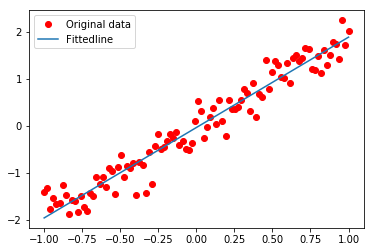

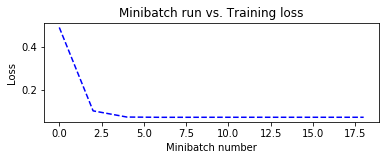

x=0.2,z= [0.35159445]


In [7]:
plotdata = {"batchsize":[],"loss":[]}
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx,val in enumerate(a)]
#初始化所有变量
init = tf.global_variables_initializer()
#定义参数
training_epochs = 20
display_step = 2

#启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata={"batchsize":[],"loss":[]}
    #向模型输入数据
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:",epoch+1,"cost=",loss,"W=",sess.run(W),"b=",sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    
    print(" Finished!")
    print("cost=",sess.run(cost,feed_dict={X:train_X,Y:train_Y}),"W=",sess.run(W),"b=",sess.run(b))
    #图形显示
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W) * train_X + sess.run(b),label='Fittedline')
    plt.legend()
    plt.show()

    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"],plotdata["avgloss"],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')

    plt.show()
    
    print("x=0.2,z=",sess.run(z,feed_dict={X:0.2}))